# Juntando R + Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# R PY2 : Tener preinstalado R

import rpy2

In [2]:
import rpy2.robjects as ro
# Convertir de Numpy a Rpy2
import rpy2.robjects.numpy2ri


In [3]:
rpy2.robjects.numpy2ri.activate()

In [4]:
codigo_r= """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [5]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x000002394541B6C8 / R:0x0000023945ADD5A8>

In [6]:
saludar_py= ro.globalenv["saludar"]

In [7]:
res = saludar_py("ANDES MG")
res[0]

'Hola,  ANDES MG'

In [8]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [183]:
var_from_python= ro.FloatVector(np.arange(1,5,0.1))

In [184]:
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [11]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [12]:
ro.globalenv["var_to_r"]= var_from_python

In [13]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [14]:
ro.r("sum(var_to_r)")

array([118.])

In [15]:
ro.r("mean(var_to_r)")

array([2.95])

In [16]:
np.sum(var_from_python)

118.00000000000007

In [17]:
np.mean(var_from_python)

2.950000000000002

In [18]:
ro.r("summary(var_to_r)")

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [19]:
ro.r("hist(var_to_r, breaks=4)")

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x0000023945354F48 / R:0x000002394377CBE0>
[IntVe..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000023945A73EC8 / R:0x0000023945C1EF20>
[1, 2, 3, 4, 5]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000023945BC0D48 / R:0x0000023945C23A20>
[11, 10, 10, 9]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000023945BC0FC8 / R:0x0000023945C1EB10>
[0.275000, 0.250000, 0.250000, 0.225000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000023945BC3208 / R:0x0000023945C1E980>
[1.500000, 2.500000, 3.500000, 4.500000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000023945BC3408 / R:0x0000023945C21470>
['var_to_r']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000023945A784C8 / R:0x0000023941B03E10>
[       1]

## Trabajo conjunto R +Python instalar paquetes de R

In [20]:
from rpy2.robjects.packages import importr


In [21]:
ro.r("install.packages ('extRemes')")
extremes = importr("extRemes")

In [22]:
fevd= extremes.fevd

In [24]:
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x0000023945BE3910 / R:0x0000023948FEB488>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

In [69]:
%config IPCompleter.greedy=True
mpath='../src/datasets/time'
pfile='time_series_AMG.txt'
src=mpath+'/'+pfile
data=pd.read_csv(src, sep=';', parse_dates=[[0,1]], names=["date", "time", "wind_speed"],  index_col=0, skiprows=1)
                
data.head()


,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [128]:
max_ws= data.wind_speed.groupby(pd.Grouper(freq="A")).max()
max_ws
len(max_ws)
import random
colores=[]
colores= [ 1 for i in range(1,len(max_ws)) ]
colores

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

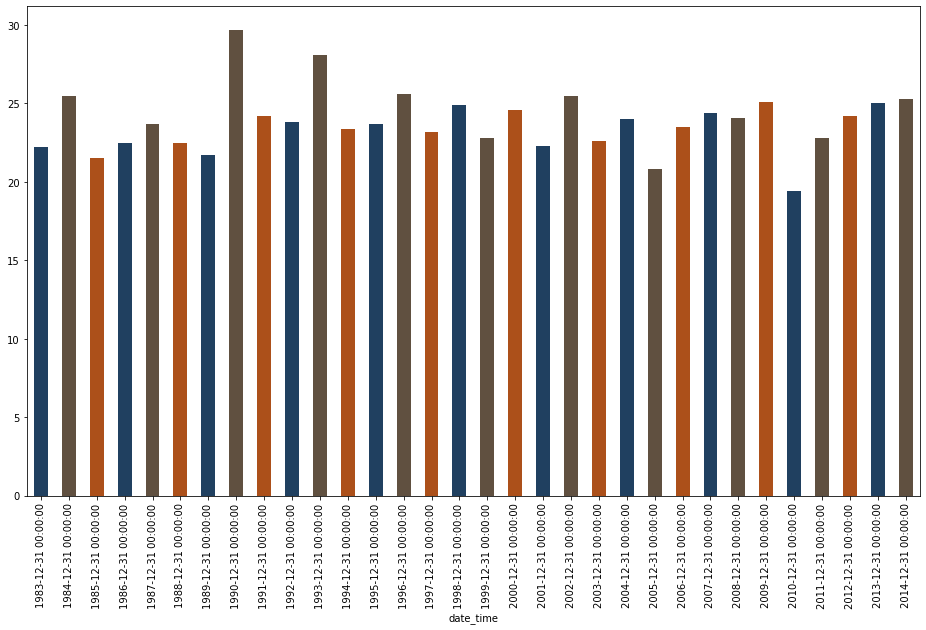

In [129]:
max_ws.plot(kind="bar", figsize=(16,9) , color = ["#204060","#605040", "#ac501a"])

In [130]:
result= fevd(max_ws.values, type="GEV", method="GMLE")

In [132]:
result

R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x00000239632BC448 / R:0x0000023944A97AD8>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x0000023963348888 / R:0x00000239480D74E0>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000023963330888 / R:0x0000023947D94DA0>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000023963332688 / R:0x0000023948C61CA0>
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.Array'>
  R object with classes: ('array',) mapped to:
<Array - Python:0x00000239630427C8 / R:0x000002394F97D8F0>
[       0,        0,        0,        0, ...,        0,        0,        0,        0]
...
  x: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000023962FFC988 / R:0x000002394F98B538>
['na.fail']
  priorFun: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000023962FFC508 / R:0x000002394F971468>
['location', 'scale', 'shape']
R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x00000239632BC448 / R:0x0000023944A97AD8>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]
R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x00000239632BC448 / R:0x0000023944A97AD8>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]

In [134]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x00000239632BC448 / R:0x0000023944A97AD8>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x0000023963362248 / R:0x00000239480D74E0>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000023963361188 / R:0x0000023947D94DA0>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000023963361D88 / R:0x0000023948C61CA0>
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.Array'>
  R object with classes: ('array',) mapped to:
<Array - Python:0x0000023963362988 / R:0x000002394F97D8F0>
[ 

In [136]:
result.names

'call','data.name','weights','missing....,...,'na.action','parnames','results','initial....


In [138]:
print (result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 

 [5] "in.data"         "x"               "priorFun"        "priorParams"    

 [9] "method"          "type"            "period.basis"    "par.models"     

[13] "const.loc"       "const.scale"     "const.shape"     "n"              

[17] "na.action"       "parnames"        "results"         "initial.results"



In [141]:
res=result.rx("results")
print (res)

$results

$results$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$results$value

[1] 1e+16



$results$counts

function gradient 

       1        1 



$results$convergence

[1] 0



$results$message

NULL



$results$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$results$num.pars

$results$num.pars$location

[1] 1



$results$num.pars$scale

[1] 1



$results$num.pars$shape

[1] 1









In [143]:
print (res[0])

$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







In [147]:
print (res[0].r_repr)

<bound method RObjectMixin.r_repr of R object with classes: ('list',) mapped to:
<ListVector - Python:0x00000239633718C8 / R:0x0000023942BC9FA0>
[Floa..., Floa..., IntV..., IntV..., RNUL..., Matrix, List...]
  par: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000023963371A48 / R:0x0000023950097C28>
[23.063942, 1.757691, -0.162882]
  value: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000023963371D08 / R:0x0000023950094E30>
[10000000000000066.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000023963371A88 / R:0x0000023950094DF8>
[1, 1]
  convergence: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000002396336F148 / R:0x0000023950094DC0>
[0]
  message: <class 'rpy2.rinterface.RNULLType'>
  rpy2.ri

In [153]:
loc, scale, shape= res[0].rx("par")[0]


In [155]:
loc, scale, shape

(23.063941519915588, 1.7576912874286317, -0.1628816367714792)

### Magia oscura

## Funcion magica para R

In [158]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [160]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mode::

In [165]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [179]:
%%R
X1 = c(1,4,5,7)
Y  = c(2,4,3,9)
lm= lm(Y-X1)
summary(lm)


Error in formula.default(object, env = baseenv()) : invalid formula


PermissionError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\root\\AppData\\Local\\Temp\\tmp2c9autng\\Rplots001.png'

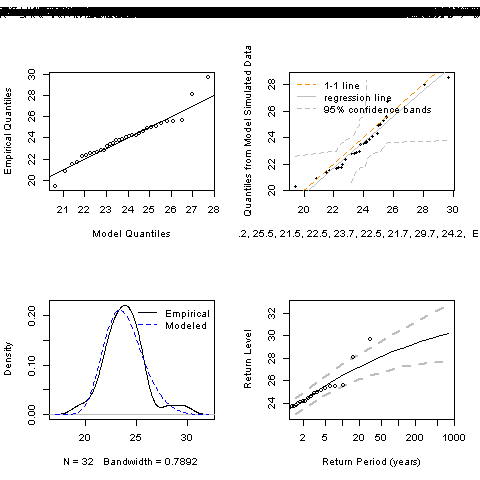

In [181]:
%R -i result plot.fevd(result)

# Ejemplo de R Python y RMAGIC

In [197]:
metodos= ["MLE", "GMLE", "Lmoments"]
tipos=    ["GEV", "Gumbel"]


 Tipo de jauste:  GEV
tipo de método del ajuste:  MLE
$par

  location      scale      shape 

23.0517078  1.8085853 -0.1497984 



$value

[1] 66.22729



$counts

function gradient 

      28        6 



$convergence

[1] 0



$message

NULL



$hessian

           location      scale     shape

location  9.1825628 -0.3982934  11.22038

scale    -0.3982934 21.4422632  19.81854

shape    11.2203805 19.8185358 172.17411



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







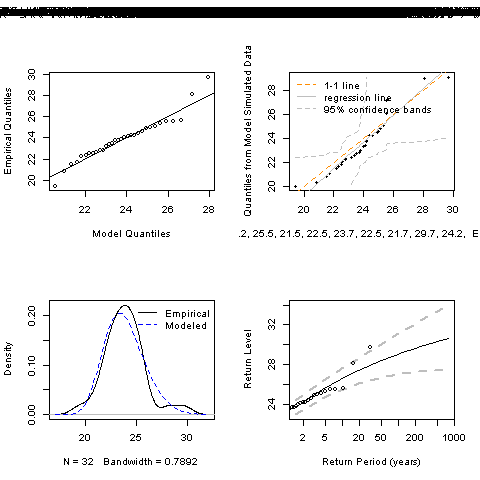

 Tipo de jauste:  GEV
tipo de método del ajuste:  GMLE
$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







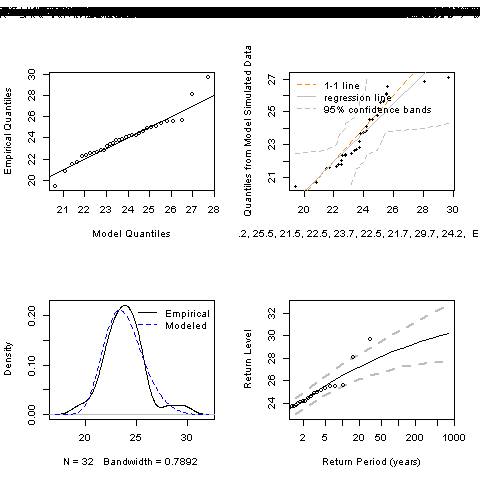

 Tipo de jauste:  GEV
tipo de método del ajuste:  Lmoments
  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



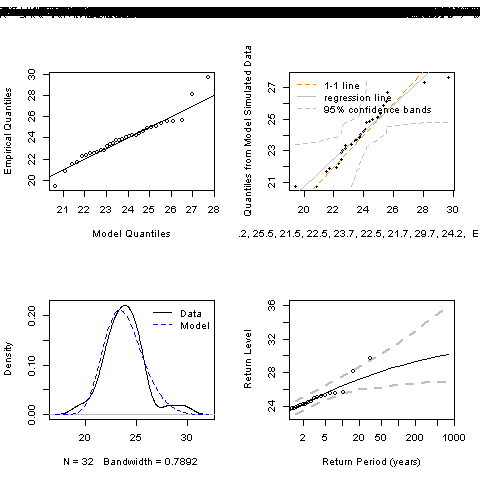

 Tipo de jauste:  Gumbel
tipo de método del ajuste:  MLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







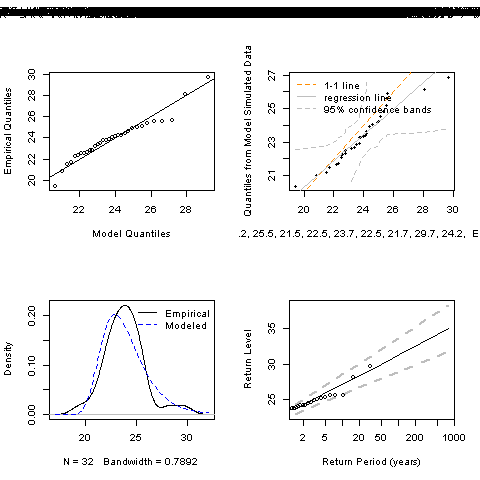

 Tipo de jauste:  Gumbel
tipo de método del ajuste:  GMLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







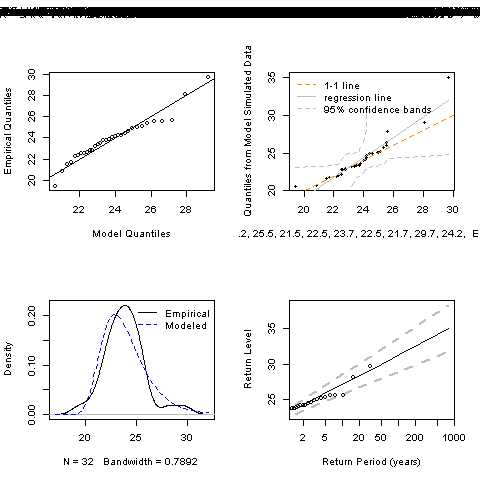

 Tipo de jauste:  Gumbel
tipo de método del ajuste:  Lmoments


RRuntimeError: Error in (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  : 
  fevd: currently, Lmoments are only handled for estimation of GEV and GP distribution parameters.


In [199]:
for t in tipos:
    for m in metodos:
        print( " Tipo de jauste: " , t)
        print ("tipo de método del ajuste: ", m)
        result= fevd(max_ws.values, method=m, type=t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)
        